# K-Means Clustering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df= sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# model
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#importing the data in features
X= df[['age','fare']]
#fill the NaN values in X
X.fillna(X.mean(), inplace=True)
# normalize/ scale the data
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

#perform clustering
model= KMeans(n_clusters=5)
model.fit(X_scaled)

#assign cluster labels to the data
df['cluster']= model.labels_

C:\Users\BROTHER COMPUTER\AppData\Local\Temp\ipykernel_3584\2920354235.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)
c:\Users\BROTHER COMPUTER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,cluster
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,3
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,4
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,3
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,3


In [6]:
df['cluster'].unique()

array([3, 4, 0, 1, 2])

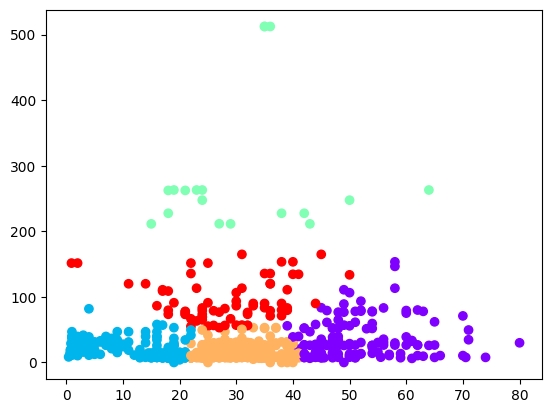

In [7]:
# lets plot it
plt.scatter(df['age'], df['fare'], c=df['cluster'], cmap='rainbow')

Text(0, 0.5, 'Fare')

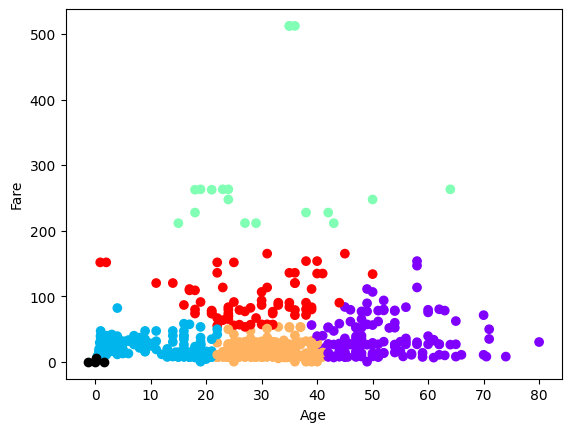

In [8]:
# lets have an advance look at the plot
plt.scatter(df['age'],df['fare'], c=df['cluster'], cmap='rainbow')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color='black')

# we can add labels as well
plt.xlabel('Age')
plt.ylabel('Fare')

#the  centroid for each cluster will show as black color point

In [9]:
# ploting this using plotly
import plotly.express as px
fig= px.scatter(df, x='age', y='fare', color='cluster')
fig.show()

In [10]:
# lets plot 3d
import plotly.express as px
fig= px.scatter_3d(df, x='age', y='fare', z='pclass', color='cluster')
fig.show()

In [11]:
#plotting parallel coorinate plot
fig= px.parallel_coordinates(df, color='cluster', title='Titanic Clusters')
fig.show()


# To save ML Model we use two libraries: joblib, pickle

In [12]:
pip install joblib

In [13]:
import joblib

In [14]:
# saving the model (write the name of the model you have given in code, write the name of your choice.jblib)
joblib.dump(model, 'k_means_clustering.joblib')

['k_means_clustering.joblib']

In [15]:
# to load the model
model_load= joblib.load('k_means_clustering.joblib')

In [16]:
# lets try saving ml model of decision tree classifier

# load data set
import seaborn as sns
df_1= sns.load_dataset('tips')
df_1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [17]:
df_1.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [18]:
df_1. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


    We have to convert the 'smoker , day and time' col to float using preprocessing label encoder

In [19]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder().fit(df_1['smoker'])
df_1['smoker']= le.transform(df_1['smoker'])

In [20]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder().fit(df_1['day'])
df_1['day']= le.transform(df_1['day'])

In [21]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder().fit(df_1['time'])
df_1['time']= le.transform(df_1['time'])

In [22]:
df_1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,2,0,2
1,10.34,1.66,Male,0,2,0,3
2,21.01,3.50,Male,0,2,0,3
3,23.68,3.31,Male,0,2,0,2
4,24.59,3.61,Female,0,2,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,0,1,0,3
240,27.18,2.00,Female,1,1,0,2
241,22.67,2.00,Male,1,1,0,2
242,17.82,1.75,Male,0,1,0,2


In [23]:
X=df_1.drop(columns='sex')
y= df_1['sex']

In [24]:
from sklearn.tree import DecisionTreeClassifier
model_1 = DecisionTreeClassifier()
model_1.fit(X, y)



DecisionTreeClassifier()

In [25]:
# to save this trained model
joblib.dump(model_1, 'tipsmodel.joblib')

['tipsmodel.joblib']

In [26]:
joblib.load('tipsmodel.joblib')

DecisionTreeClassifier()